### Q1. [3 points] Build a ensemble model predicting partisanship.

In [208]:
# importing libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [209]:
FX_indicators_2020_df = pd.read_csv('FX_indicators_2020.csv')

In [211]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,MOVED_RDMA,MOVED_DRMA,MOVED_AWMA,MOVED_ADMA,MOVED_ARMA,MOVED_RDMB,MOVED_DRMB,MOVED_AWMB,MOVED_ADMB,MOVED_ARMB
0,84508,3,0,25,4,0,0,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608312,1,0,35,0,0,3,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222821,3,0,73,3,0,0,42,36,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137882,2,0,54,1,1,0,37,34,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531303,2,0,51,0,3,0,46,46,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384983,189580,1,55,23,5,0,1,38,39,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384984,137630,2,0,29,0,1,1,36,37,35,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N
384985,140246,2,0,68,1,0,0,33,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
FX_indicators_2020_df.describe()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,PRS16_PD,PRS16_PR,MSG_A,MSG_B
count,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,...,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000,384987.000000
mean,318457.590755,2.002221,0.570999,50.864408,1.205781,0.730287,0.618231,39.256326,37.093512,41.493762,...,0.982771,0.044602,0.145909,0.530914,0.534854,12.610530,46.943522,51.377199,0.077829,0.077764
std,183665.590377,0.816945,5.323766,18.141040,1.306398,1.063950,0.950737,6.934079,7.190315,7.296544,...,0.678549,0.330575,0.480255,0.521946,0.537452,1.089046,5.754449,5.814682,0.267902,0.267800
min,2.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.100000,17.000000,0.000000,0.000000
25%,159325.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,32.000000,35.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,42.800000,47.800000,0.000000,0.000000
50%,318561.000000,2.000000,0.000000,51.000000,1.000000,0.000000,0.000000,38.000000,36.000000,41.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,45.800000,52.500000,0.000000,0.000000
75%,477540.000000,3.000000,0.000000,65.000000,2.000000,1.000000,1.000000,44.000000,40.000000,48.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,13.000000,50.400000,55.600000,0.000000,0.000000
max,636572.000000,3.000000,100.000000,113.000000,9.000000,9.000000,9.000000,65.000000,65.000000,65.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,16.000000,80.600000,64.300000,1.000000,1.000000


In [213]:
FX_indicators_2020_df.dtypes

VOTER_ID       int64
SET_NO         int64
OPP_SEX        int64
AGE            int64
HH_ND          int64
               ...  
MOVED_RDMB    object
MOVED_DRMB    object
MOVED_AWMB    object
MOVED_ADMB    object
MOVED_ARMB    object
Length: 152, dtype: object

In [214]:
FX_indicators_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Columns: 152 entries, VOTER_ID to MOVED_ARMB
dtypes: float64(2), int64(105), object(45)
memory usage: 446.5+ MB


In [215]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 152)
VOTER_ID           0
SET_NO             0
OPP_SEX            0
AGE                0
HH_ND              0
               ...  
MOVED_RDMB    371383
MOVED_DRMB    371383
MOVED_AWMB    371383
MOVED_ADMB    371383
MOVED_ARMB    371383
Length: 152, dtype: int64


In [216]:
FX_indicators_2020_df.isnull().any()

VOTER_ID      False
SET_NO        False
OPP_SEX       False
AGE           False
HH_ND         False
              ...  
MOVED_RDMB     True
MOVED_DRMB     True
MOVED_AWMB     True
MOVED_ADMB     True
MOVED_ARMB     True
Length: 152, dtype: bool

In [217]:
FX_indicators_2020_df.drop(columns = ['CAND1S', 'CAND2S', 'MESSAGE'], axis=1, inplace=True)

In [218]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'COMM_LT10':'ED_4COL'].columns, axis = 1)

In [219]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'H_AFDLN3P':'MSG_B'].columns, axis = 1)

In [220]:
FX_indicators_2020_df = FX_indicators_2020_df.drop(FX_indicators_2020_df.loc[:, 'CAND1_UND':'MOVED_ARMB'].columns, axis = 1)

In [221]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
0,84508,3,0,25,4,0,0,38,39,38,...,1,4,0,1,NaN,Y,N,Y,N,N
1,608312,1,0,35,0,0,3,46,46,46,...,3,3,1,0,NaN,NaN,NaN,N,N,Y
2,222821,3,0,73,3,0,0,42,36,48,...,2,14,1,0,N,NaN,NaN,N,N,N
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,Y,Y,N,Y,N,N
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,Y,Y,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384982,430307,2,0,64,3,0,0,32,32,33,...,2,5,0,1,NaN,Y,N,Y,N,N
384983,189580,1,55,23,5,0,1,38,39,38,...,1,4,0,1,N,Y,N,Y,N,N
384984,137630,2,0,29,0,1,1,36,37,35,...,1,3,1,0,N,NaN,NaN,N,N,Y
384985,140246,2,0,68,1,0,0,33,32,34,...,1,39,1,0,NaN,N,Y,N,Y,N


In [222]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(384987, 26)
VOTER_ID         0
SET_NO           0
OPP_SEX          0
AGE              0
HH_ND            0
HH_NR            0
HH_NI            0
MED_AGE          0
MED_AGE_M        0
MED_AGE_F        0
NH_WHITE         0
NH_AA            0
NH_NATAM         0
NH_ASIAN         0
NH_HPI           0
NH_OTHER         0
NH_MULT          0
HISP             0
GENDER_F         0
GENDER_M         0
VG_14_DV     98701
D2           92878
R2           92878
D3               0
R3               0
I3           48094
dtype: int64


In [223]:
FX_indicators_2020_df.dropna(inplace=True)

In [224]:
FX_indicators_2020_df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,NH_MULT,HISP,GENDER_F,GENDER_M,VG_14_DV,D2,R2,D3,R3,I3
3,137882,2,0,54,1,1,0,37,34,51,...,0,4,1,0,Y,Y,N,Y,N,N
4,531303,2,0,51,0,3,0,46,46,46,...,3,3,0,1,Y,Y,N,Y,N,N
8,333636,3,0,35,1,1,0,31,24,34,...,1,35,1,0,N,N,Y,N,Y,N
9,332197,3,0,74,2,0,1,37,37,38,...,7,2,0,1,Y,Y,N,Y,N,N
14,367936,1,0,75,0,2,0,50,49,52,...,1,17,0,1,Y,N,Y,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,...,3,3,1,0,N,Y,N,Y,N,N
384975,519934,2,0,78,1,0,0,36,36,37,...,1,3,1,0,Y,Y,N,Y,N,N
384976,78670,2,0,47,2,0,0,40,37,42,...,2,7,1,0,Y,N,Y,N,Y,N
384981,174573,1,0,44,0,1,3,25,22,31,...,2,2,1,0,N,N,Y,N,Y,N


In [225]:
print(FX_indicators_2020_df.shape) # find shape of dataframe
print(FX_indicators_2020_df.isnull().sum()) # check if any nulls

(186070, 26)
VOTER_ID     0
SET_NO       0
OPP_SEX      0
AGE          0
HH_ND        0
HH_NR        0
HH_NI        0
MED_AGE      0
MED_AGE_M    0
MED_AGE_F    0
NH_WHITE     0
NH_AA        0
NH_NATAM     0
NH_ASIAN     0
NH_HPI       0
NH_OTHER     0
NH_MULT      0
HISP         0
GENDER_F     0
GENDER_M     0
VG_14_DV     0
D2           0
R2           0
D3           0
R3           0
I3           0
dtype: int64


In [226]:
FX_indicators_2020_df_new = pd.get_dummies(FX_indicators_2020_df)

In [227]:
FX_indicators_2020_df_new

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,...,D2_N,D2_Y,R2_N,R2_Y,D3_N,D3_Y,R3_N,R3_Y,I3_N,I3_Y
3,137882,2,0,54,1,1,0,37,34,51,...,0,1,1,0,0,1,1,0,1,0
4,531303,2,0,51,0,3,0,46,46,46,...,0,1,1,0,0,1,1,0,1,0
8,333636,3,0,35,1,1,0,31,24,34,...,1,0,0,1,1,0,0,1,1,0
9,332197,3,0,74,2,0,1,37,37,38,...,0,1,1,0,0,1,1,0,1,0
14,367936,1,0,75,0,2,0,50,49,52,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,...,0,1,1,0,0,1,1,0,1,0
384975,519934,2,0,78,1,0,0,36,36,37,...,0,1,1,0,0,1,1,0,1,0
384976,78670,2,0,47,2,0,0,40,37,42,...,1,0,0,1,1,0,0,1,1,0
384981,174573,1,0,44,0,1,3,25,22,31,...,1,0,0,1,1,0,0,1,1,0


In [228]:
X = FX_indicators_2020_df_new.drop(columns = ['VG_14_DV_Y','VG_14_DV_N', 'D2_N', 'D2_Y', 'R2_N', 'R2_Y', 'D3_N', 'D3_Y',
                                              'R3_N', 'R3_Y','I3_N', 'I3_Y'])
y = FX_indicators_2020_df_new['D2_Y']

In [229]:
X

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,MED_AGE_M,MED_AGE_F,NH_WHITE,NH_AA,NH_NATAM,NH_ASIAN,NH_HPI,NH_OTHER,NH_MULT,HISP,GENDER_F,GENDER_M
3,137882,2,0,54,1,1,0,37,34,51,61,34,1,0,0,0,0,4,1,0
4,531303,2,0,51,0,3,0,46,46,46,88,2,0,4,0,0,3,3,0,1
8,333636,3,0,35,1,1,0,31,24,34,46,19,0,0,0,0,1,35,1,0
9,332197,3,0,74,2,0,1,37,37,38,54,37,0,1,0,0,7,2,0,1
14,367936,1,0,75,0,2,0,50,49,52,82,0,0,0,0,0,1,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384974,488310,2,0,43,2,0,0,46,46,46,88,2,0,4,0,0,3,3,1,0
384975,519934,2,0,78,1,0,0,36,36,37,78,5,0,12,0,1,1,3,1,0
384976,78670,2,0,47,2,0,0,40,37,42,42,45,0,1,0,5,2,7,1,0
384981,174573,1,0,44,0,1,3,25,22,31,62,26,0,7,0,2,2,2,1,0


In [230]:
y

3         1
4         1
8         0
9         1
14        0
         ..
384974    1
384975    1
384976    0
384981    0
384983    1
Name: D2_Y, Length: 186070, dtype: uint8

In [232]:
 from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [234]:
# Bagging meta-estimator classification (BaggingClassifier)

from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5723473244836172

In [236]:
#  Bagging meta-estimator regression (BaggingRegressor) 

from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.09871938693044124

In [240]:
# code for generating cumulative gains and decile for bagged tree
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from dmba import plotDecisionTree
from sklearn import tree
from IPython.display import Image
import pydotplus
from graphviz import Digraph
from sklearn.tree import export_graphviz
import warnings

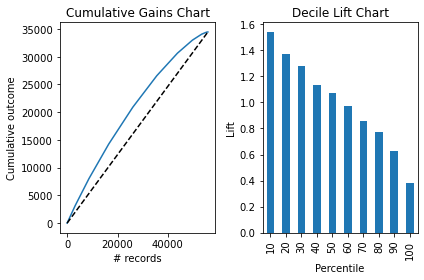

In [242]:
# code for generating cumulative gains and decile for bagged tree

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [243]:
# # code for running a random forest, plotting variable importance plot, and computing accuracy

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)


# confusion matrix for validation set
classificationSummary(y_test, rf.predict(X_test))

Confusion Matrix (Accuracy 0.5908)

       Prediction
Actual     0     1
     0  4692 16157
     1  6686 28286


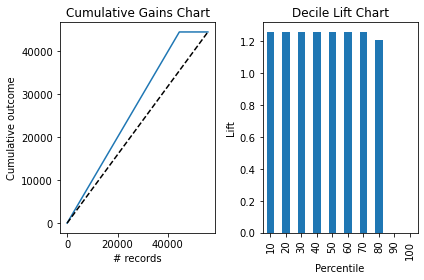

In [244]:
# code for generating cumulative gains and decile for random forest

pred_v = pd.Series(rf.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [253]:
# AdaBoost with classifier

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6265025707171137

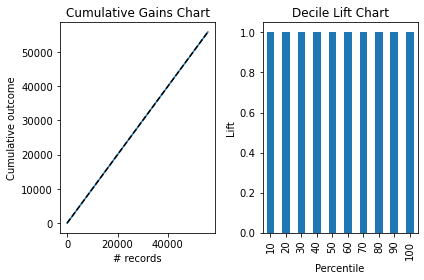

In [254]:
# code for generating cumulative gains and decile AdaBoost with classifier

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [255]:
# AdaBoost with regressor

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.014127057873993043

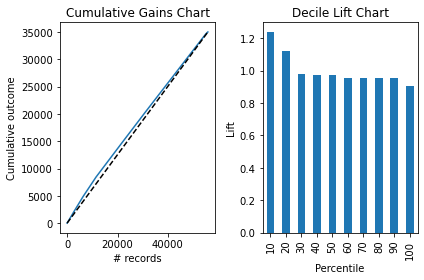

In [256]:
# code for generating cumulative gains and decile AdaBoost with regressor

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [257]:
# Gradient Boosting (GBM) with Classifier

from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6265025707171137

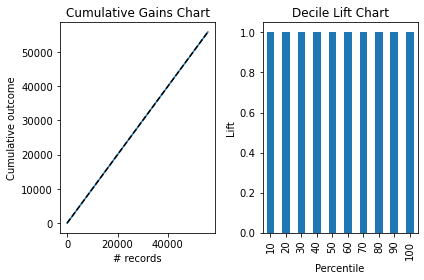

In [258]:
# code for generating cumulative gains and decile # Gradient Boosting (GBM) with Classifier


pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [260]:
# # Gradient Boosting (GBM) with regresspr

from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.035690161825475575

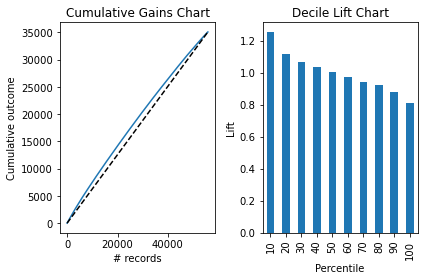

In [261]:
# code for generating cumulative gains and decile # Gradient Boosting (GBM) with regresspr


pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [276]:
# XGBoost with Classifier

import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

[21:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6304795686211282

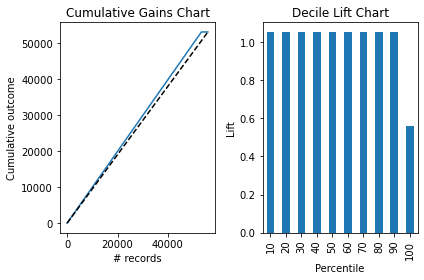

In [277]:
# code for generating cumulative gains and decile # XGBoost with Classifier

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [280]:
# # XGBoost with XGBRegressor

import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.03260897430263843

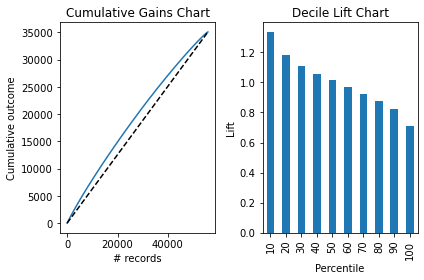

In [281]:
# code for generating cumulative gains and decile # XGBoost with XGBRegressor

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [282]:
from catboost import CatBoostClassifier

In [287]:
# catboost with classifier

from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
model.score(X_test,y_test)

Learning rate set to 0.105501
0:	learn: 0.6864488	test: 0.6865388	best: 0.6865388 (0)	total: 613ms	remaining: 10m 12s
1:	learn: 0.6811052	test: 0.6812759	best: 0.6812759 (1)	total: 1.2s	remaining: 9m 58s
2:	learn: 0.6768320	test: 0.6770883	best: 0.6770883 (2)	total: 1.91s	remaining: 10m 35s
3:	learn: 0.6734271	test: 0.6737464	best: 0.6737464 (3)	total: 2.49s	remaining: 10m 20s
4:	learn: 0.6706928	test: 0.6710901	best: 0.6710901 (4)	total: 3.34s	remaining: 11m 4s
5:	learn: 0.6685071	test: 0.6689763	best: 0.6689763 (5)	total: 3.79s	remaining: 10m 27s
6:	learn: 0.6668135	test: 0.6673322	best: 0.6673322 (6)	total: 4.34s	remaining: 10m 16s
7:	learn: 0.6654485	test: 0.6660085	best: 0.6660085 (7)	total: 4.84s	remaining: 10m
8:	learn: 0.6643531	test: 0.6649643	best: 0.6649643 (8)	total: 5.53s	remaining: 10m 8s
9:	learn: 0.6634762	test: 0.6641165	best: 0.6641165 (9)	total: 5.63s	remaining: 9m 17s
10:	learn: 0.6627711	test: 0.6634375	best: 0.6634375 (10)	total: 5.96s	remaining: 8m 55s
11:	learn:

93:	learn: 0.6581945	test: 0.6609996	best: 0.6608204 (33)	total: 44.6s	remaining: 7m 9s
94:	learn: 0.6581848	test: 0.6610042	best: 0.6608204 (33)	total: 45s	remaining: 7m 9s
95:	learn: 0.6581510	test: 0.6610061	best: 0.6608204 (33)	total: 45.5s	remaining: 7m 8s
96:	learn: 0.6581224	test: 0.6610122	best: 0.6608204 (33)	total: 46s	remaining: 7m 8s
97:	learn: 0.6581143	test: 0.6610118	best: 0.6608204 (33)	total: 46.5s	remaining: 7m 8s
98:	learn: 0.6581058	test: 0.6610119	best: 0.6608204 (33)	total: 47s	remaining: 7m 7s
99:	learn: 0.6580901	test: 0.6610098	best: 0.6608204 (33)	total: 47.4s	remaining: 7m 6s
100:	learn: 0.6580748	test: 0.6610148	best: 0.6608204 (33)	total: 47.8s	remaining: 7m 5s
101:	learn: 0.6580390	test: 0.6610053	best: 0.6608204 (33)	total: 48.2s	remaining: 7m 4s
102:	learn: 0.6580077	test: 0.6610149	best: 0.6608204 (33)	total: 48.8s	remaining: 7m 5s
103:	learn: 0.6580077	test: 0.6610149	best: 0.6608204 (33)	total: 49s	remaining: 7m 1s
104:	learn: 0.6579791	test: 0.661015

185:	learn: 0.6558720	test: 0.6610996	best: 0.6608204 (33)	total: 1m 35s	remaining: 6m 57s
186:	learn: 0.6558520	test: 0.6610993	best: 0.6608204 (33)	total: 1m 36s	remaining: 6m 58s
187:	learn: 0.6558281	test: 0.6610992	best: 0.6608204 (33)	total: 1m 36s	remaining: 6m 58s
188:	learn: 0.6558242	test: 0.6610986	best: 0.6608204 (33)	total: 1m 37s	remaining: 6m 58s
189:	learn: 0.6557957	test: 0.6610981	best: 0.6608204 (33)	total: 1m 38s	remaining: 6m 58s
190:	learn: 0.6557623	test: 0.6610994	best: 0.6608204 (33)	total: 1m 39s	remaining: 6m 59s
191:	learn: 0.6557386	test: 0.6611012	best: 0.6608204 (33)	total: 1m 39s	remaining: 6m 59s
192:	learn: 0.6557129	test: 0.6611085	best: 0.6608204 (33)	total: 1m 40s	remaining: 7m
193:	learn: 0.6556713	test: 0.6611165	best: 0.6608204 (33)	total: 1m 41s	remaining: 7m
194:	learn: 0.6556431	test: 0.6611292	best: 0.6608204 (33)	total: 1m 41s	remaining: 7m
195:	learn: 0.6556333	test: 0.6611303	best: 0.6608204 (33)	total: 1m 42s	remaining: 7m
196:	learn: 0.6

276:	learn: 0.6538330	test: 0.6612347	best: 0.6608204 (33)	total: 2m 33s	remaining: 6m 39s
277:	learn: 0.6537991	test: 0.6612338	best: 0.6608204 (33)	total: 2m 33s	remaining: 6m 39s
278:	learn: 0.6537900	test: 0.6612324	best: 0.6608204 (33)	total: 2m 34s	remaining: 6m 38s
279:	learn: 0.6537713	test: 0.6612432	best: 0.6608204 (33)	total: 2m 34s	remaining: 6m 38s
280:	learn: 0.6537547	test: 0.6612412	best: 0.6608204 (33)	total: 2m 35s	remaining: 6m 37s
281:	learn: 0.6537221	test: 0.6612453	best: 0.6608204 (33)	total: 2m 35s	remaining: 6m 37s
282:	learn: 0.6537096	test: 0.6612451	best: 0.6608204 (33)	total: 2m 36s	remaining: 6m 36s
283:	learn: 0.6536879	test: 0.6612471	best: 0.6608204 (33)	total: 2m 37s	remaining: 6m 36s
284:	learn: 0.6536760	test: 0.6612517	best: 0.6608204 (33)	total: 2m 37s	remaining: 6m 35s
285:	learn: 0.6536544	test: 0.6612583	best: 0.6608204 (33)	total: 2m 38s	remaining: 6m 34s
286:	learn: 0.6536266	test: 0.6612644	best: 0.6608204 (33)	total: 2m 38s	remaining: 6m 34s

367:	learn: 0.6517029	test: 0.6613951	best: 0.6608204 (33)	total: 3m 23s	remaining: 5m 48s
368:	learn: 0.6516943	test: 0.6613918	best: 0.6608204 (33)	total: 3m 23s	remaining: 5m 47s
369:	learn: 0.6516853	test: 0.6613912	best: 0.6608204 (33)	total: 3m 23s	remaining: 5m 47s
370:	learn: 0.6516449	test: 0.6614125	best: 0.6608204 (33)	total: 3m 24s	remaining: 5m 46s
371:	learn: 0.6515970	test: 0.6614223	best: 0.6608204 (33)	total: 3m 24s	remaining: 5m 46s
372:	learn: 0.6515637	test: 0.6614202	best: 0.6608204 (33)	total: 3m 25s	remaining: 5m 45s
373:	learn: 0.6515355	test: 0.6614226	best: 0.6608204 (33)	total: 3m 26s	remaining: 5m 45s
374:	learn: 0.6515045	test: 0.6614200	best: 0.6608204 (33)	total: 3m 26s	remaining: 5m 44s
375:	learn: 0.6514774	test: 0.6614141	best: 0.6608204 (33)	total: 3m 27s	remaining: 5m 44s
376:	learn: 0.6514501	test: 0.6614149	best: 0.6608204 (33)	total: 3m 27s	remaining: 5m 43s
377:	learn: 0.6513911	test: 0.6614176	best: 0.6608204 (33)	total: 3m 28s	remaining: 5m 43s

458:	learn: 0.6497560	test: 0.6615972	best: 0.6608204 (33)	total: 4m 12s	remaining: 4m 57s
459:	learn: 0.6497385	test: 0.6615990	best: 0.6608204 (33)	total: 4m 12s	remaining: 4m 56s
460:	learn: 0.6497155	test: 0.6616020	best: 0.6608204 (33)	total: 4m 13s	remaining: 4m 56s
461:	learn: 0.6497012	test: 0.6616006	best: 0.6608204 (33)	total: 4m 14s	remaining: 4m 55s
462:	learn: 0.6496774	test: 0.6616084	best: 0.6608204 (33)	total: 4m 14s	remaining: 4m 55s
463:	learn: 0.6496592	test: 0.6616046	best: 0.6608204 (33)	total: 4m 15s	remaining: 4m 54s
464:	learn: 0.6496495	test: 0.6616017	best: 0.6608204 (33)	total: 4m 15s	remaining: 4m 54s
465:	learn: 0.6496253	test: 0.6616110	best: 0.6608204 (33)	total: 4m 16s	remaining: 4m 54s
466:	learn: 0.6496167	test: 0.6616088	best: 0.6608204 (33)	total: 4m 17s	remaining: 4m 53s
467:	learn: 0.6496044	test: 0.6616076	best: 0.6608204 (33)	total: 4m 17s	remaining: 4m 52s
468:	learn: 0.6495858	test: 0.6616119	best: 0.6608204 (33)	total: 4m 17s	remaining: 4m 52s

549:	learn: 0.6479562	test: 0.6617489	best: 0.6608204 (33)	total: 4m 56s	remaining: 4m 2s
550:	learn: 0.6479398	test: 0.6617477	best: 0.6608204 (33)	total: 4m 57s	remaining: 4m 2s
551:	learn: 0.6479252	test: 0.6617465	best: 0.6608204 (33)	total: 4m 57s	remaining: 4m 1s
552:	learn: 0.6479013	test: 0.6617483	best: 0.6608204 (33)	total: 4m 58s	remaining: 4m
553:	learn: 0.6478816	test: 0.6617461	best: 0.6608204 (33)	total: 4m 58s	remaining: 4m
554:	learn: 0.6478626	test: 0.6617503	best: 0.6608204 (33)	total: 4m 58s	remaining: 3m 59s
555:	learn: 0.6478262	test: 0.6617511	best: 0.6608204 (33)	total: 4m 59s	remaining: 3m 58s
556:	learn: 0.6478052	test: 0.6617572	best: 0.6608204 (33)	total: 4m 59s	remaining: 3m 58s
557:	learn: 0.6477780	test: 0.6617613	best: 0.6608204 (33)	total: 5m	remaining: 3m 57s
558:	learn: 0.6477759	test: 0.6617630	best: 0.6608204 (33)	total: 5m	remaining: 3m 57s
559:	learn: 0.6477514	test: 0.6617587	best: 0.6608204 (33)	total: 5m 1s	remaining: 3m 56s
560:	learn: 0.64774

640:	learn: 0.6461027	test: 0.6619237	best: 0.6608204 (33)	total: 5m 41s	remaining: 3m 10s
641:	learn: 0.6460815	test: 0.6619315	best: 0.6608204 (33)	total: 5m 41s	remaining: 3m 10s
642:	learn: 0.6460731	test: 0.6619316	best: 0.6608204 (33)	total: 5m 42s	remaining: 3m 9s
643:	learn: 0.6460288	test: 0.6619381	best: 0.6608204 (33)	total: 5m 42s	remaining: 3m 9s
644:	learn: 0.6460145	test: 0.6619385	best: 0.6608204 (33)	total: 5m 43s	remaining: 3m 8s
645:	learn: 0.6459945	test: 0.6619396	best: 0.6608204 (33)	total: 5m 43s	remaining: 3m 8s
646:	learn: 0.6459622	test: 0.6619418	best: 0.6608204 (33)	total: 5m 44s	remaining: 3m 7s
647:	learn: 0.6459323	test: 0.6619363	best: 0.6608204 (33)	total: 5m 44s	remaining: 3m 7s
648:	learn: 0.6459215	test: 0.6619400	best: 0.6608204 (33)	total: 5m 44s	remaining: 3m 6s
649:	learn: 0.6459094	test: 0.6619357	best: 0.6608204 (33)	total: 5m 45s	remaining: 3m 6s
650:	learn: 0.6458890	test: 0.6619402	best: 0.6608204 (33)	total: 5m 46s	remaining: 3m 5s
651:	lea

731:	learn: 0.6444531	test: 0.6620055	best: 0.6608204 (33)	total: 6m 30s	remaining: 2m 23s
732:	learn: 0.6444253	test: 0.6620106	best: 0.6608204 (33)	total: 6m 31s	remaining: 2m 22s
733:	learn: 0.6444038	test: 0.6620107	best: 0.6608204 (33)	total: 6m 31s	remaining: 2m 21s
734:	learn: 0.6443936	test: 0.6620069	best: 0.6608204 (33)	total: 6m 32s	remaining: 2m 21s
735:	learn: 0.6443771	test: 0.6620020	best: 0.6608204 (33)	total: 6m 32s	remaining: 2m 20s
736:	learn: 0.6443622	test: 0.6620023	best: 0.6608204 (33)	total: 6m 33s	remaining: 2m 20s
737:	learn: 0.6443548	test: 0.6620028	best: 0.6608204 (33)	total: 6m 34s	remaining: 2m 19s
738:	learn: 0.6443348	test: 0.6620058	best: 0.6608204 (33)	total: 6m 34s	remaining: 2m 19s
739:	learn: 0.6443144	test: 0.6619999	best: 0.6608204 (33)	total: 6m 35s	remaining: 2m 18s
740:	learn: 0.6443032	test: 0.6619989	best: 0.6608204 (33)	total: 6m 35s	remaining: 2m 18s
741:	learn: 0.6442935	test: 0.6619990	best: 0.6608204 (33)	total: 6m 36s	remaining: 2m 17s

822:	learn: 0.6426692	test: 0.6621713	best: 0.6608204 (33)	total: 7m 21s	remaining: 1m 34s
823:	learn: 0.6426638	test: 0.6621744	best: 0.6608204 (33)	total: 7m 22s	remaining: 1m 34s
824:	learn: 0.6426536	test: 0.6621756	best: 0.6608204 (33)	total: 7m 22s	remaining: 1m 33s
825:	learn: 0.6426300	test: 0.6621750	best: 0.6608204 (33)	total: 7m 23s	remaining: 1m 33s
826:	learn: 0.6425934	test: 0.6621715	best: 0.6608204 (33)	total: 7m 23s	remaining: 1m 32s
827:	learn: 0.6425599	test: 0.6621748	best: 0.6608204 (33)	total: 7m 24s	remaining: 1m 32s
828:	learn: 0.6425598	test: 0.6621750	best: 0.6608204 (33)	total: 7m 25s	remaining: 1m 31s
829:	learn: 0.6425360	test: 0.6621896	best: 0.6608204 (33)	total: 7m 26s	remaining: 1m 31s
830:	learn: 0.6425107	test: 0.6622064	best: 0.6608204 (33)	total: 7m 26s	remaining: 1m 30s
831:	learn: 0.6425001	test: 0.6622120	best: 0.6608204 (33)	total: 7m 27s	remaining: 1m 30s
832:	learn: 0.6424878	test: 0.6622086	best: 0.6608204 (33)	total: 7m 28s	remaining: 1m 29s

913:	learn: 0.6408866	test: 0.6622473	best: 0.6608204 (33)	total: 8m 8s	remaining: 46s
914:	learn: 0.6408530	test: 0.6622538	best: 0.6608204 (33)	total: 8m 9s	remaining: 45.5s
915:	learn: 0.6408487	test: 0.6622513	best: 0.6608204 (33)	total: 8m 9s	remaining: 44.9s
916:	learn: 0.6408329	test: 0.6622630	best: 0.6608204 (33)	total: 8m 10s	remaining: 44.4s
917:	learn: 0.6408170	test: 0.6622617	best: 0.6608204 (33)	total: 8m 10s	remaining: 43.8s
918:	learn: 0.6408017	test: 0.6622664	best: 0.6608204 (33)	total: 8m 11s	remaining: 43.3s
919:	learn: 0.6407891	test: 0.6622725	best: 0.6608204 (33)	total: 8m 11s	remaining: 42.8s
920:	learn: 0.6407867	test: 0.6622718	best: 0.6608204 (33)	total: 8m 12s	remaining: 42.2s
921:	learn: 0.6407668	test: 0.6622758	best: 0.6608204 (33)	total: 8m 12s	remaining: 41.7s
922:	learn: 0.6407519	test: 0.6622803	best: 0.6608204 (33)	total: 8m 13s	remaining: 41.1s
923:	learn: 0.6407328	test: 0.6622801	best: 0.6608204 (33)	total: 8m 13s	remaining: 40.6s
924:	learn: 0.6

0.6265025707171137

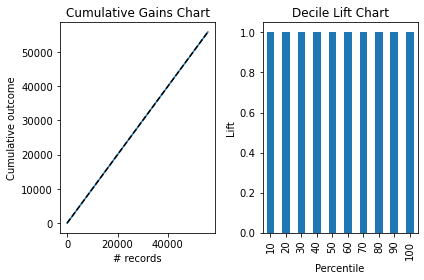

In [288]:
# code for generating cumulative gains and decile catboost with classifier

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

In [289]:
# catboost with regression 

from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(X_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(X_test, y_test))
model.score(X_test,y_test)

Learning rate set to 0.109374
0:	learn: 0.4833213	test: 0.4837378	best: 0.4837378 (0)	total: 469ms	remaining: 7m 48s
1:	learn: 0.4833090	test: 0.4837360	best: 0.4837360 (1)	total: 1.03s	remaining: 8m 36s
2:	learn: 0.4832975	test: 0.4837380	best: 0.4837360 (1)	total: 1.56s	remaining: 8m 39s
3:	learn: 0.4832935	test: 0.4837386	best: 0.4837360 (1)	total: 1.75s	remaining: 7m 16s
4:	learn: 0.4832735	test: 0.4837410	best: 0.4837360 (1)	total: 2.19s	remaining: 7m 16s
5:	learn: 0.4832529	test: 0.4837399	best: 0.4837360 (1)	total: 2.61s	remaining: 7m 11s
6:	learn: 0.4832394	test: 0.4837377	best: 0.4837360 (1)	total: 3.08s	remaining: 7m 16s
7:	learn: 0.4832270	test: 0.4837402	best: 0.4837360 (1)	total: 3.51s	remaining: 7m 14s
8:	learn: 0.4832193	test: 0.4837414	best: 0.4837360 (1)	total: 3.97s	remaining: 7m 17s
9:	learn: 0.4832040	test: 0.4837424	best: 0.4837360 (1)	total: 4.43s	remaining: 7m 18s
10:	learn: 0.4831964	test: 0.4837431	best: 0.4837360 (1)	total: 4.84s	remaining: 7m 15s
11:	learn: 0

94:	learn: 0.4825059	test: 0.4838126	best: 0.4837360 (1)	total: 37.1s	remaining: 5m 53s
95:	learn: 0.4825035	test: 0.4838130	best: 0.4837360 (1)	total: 37.5s	remaining: 5m 53s
96:	learn: 0.4825026	test: 0.4838130	best: 0.4837360 (1)	total: 37.8s	remaining: 5m 51s
97:	learn: 0.4824952	test: 0.4838160	best: 0.4837360 (1)	total: 38.2s	remaining: 5m 51s
98:	learn: 0.4824946	test: 0.4838159	best: 0.4837360 (1)	total: 38.3s	remaining: 5m 48s
99:	learn: 0.4824874	test: 0.4838201	best: 0.4837360 (1)	total: 38.7s	remaining: 5m 48s
100:	learn: 0.4824874	test: 0.4838201	best: 0.4837360 (1)	total: 38.7s	remaining: 5m 44s
101:	learn: 0.4824823	test: 0.4838181	best: 0.4837360 (1)	total: 39s	remaining: 5m 43s
102:	learn: 0.4824785	test: 0.4838228	best: 0.4837360 (1)	total: 39.4s	remaining: 5m 43s
103:	learn: 0.4824585	test: 0.4838233	best: 0.4837360 (1)	total: 39.9s	remaining: 5m 43s
104:	learn: 0.4824509	test: 0.4838228	best: 0.4837360 (1)	total: 40.2s	remaining: 5m 42s
105:	learn: 0.4824471	test: 0

187:	learn: 0.4817132	test: 0.4838938	best: 0.4837360 (1)	total: 1m 12s	remaining: 5m 11s
188:	learn: 0.4817053	test: 0.4838921	best: 0.4837360 (1)	total: 1m 12s	remaining: 5m 11s
189:	learn: 0.4816977	test: 0.4838935	best: 0.4837360 (1)	total: 1m 12s	remaining: 5m 11s
190:	learn: 0.4816912	test: 0.4838954	best: 0.4837360 (1)	total: 1m 13s	remaining: 5m 10s
191:	learn: 0.4816836	test: 0.4838942	best: 0.4837360 (1)	total: 1m 13s	remaining: 5m 11s
192:	learn: 0.4816692	test: 0.4838936	best: 0.4837360 (1)	total: 1m 14s	remaining: 5m 11s
193:	learn: 0.4816602	test: 0.4838927	best: 0.4837360 (1)	total: 1m 14s	remaining: 5m 11s
194:	learn: 0.4816561	test: 0.4838946	best: 0.4837360 (1)	total: 1m 15s	remaining: 5m 11s
195:	learn: 0.4816446	test: 0.4838939	best: 0.4837360 (1)	total: 1m 15s	remaining: 5m 11s
196:	learn: 0.4816345	test: 0.4838972	best: 0.4837360 (1)	total: 1m 16s	remaining: 5m 11s
197:	learn: 0.4816262	test: 0.4839009	best: 0.4837360 (1)	total: 1m 16s	remaining: 5m 10s
198:	learn

279:	learn: 0.4809069	test: 0.4839598	best: 0.4837360 (1)	total: 1m 48s	remaining: 4m 39s
280:	learn: 0.4809021	test: 0.4839597	best: 0.4837360 (1)	total: 1m 49s	remaining: 4m 39s
281:	learn: 0.4808828	test: 0.4839618	best: 0.4837360 (1)	total: 1m 49s	remaining: 4m 39s
282:	learn: 0.4808802	test: 0.4839640	best: 0.4837360 (1)	total: 1m 50s	remaining: 4m 38s
283:	learn: 0.4808695	test: 0.4839654	best: 0.4837360 (1)	total: 1m 50s	remaining: 4m 38s
284:	learn: 0.4808594	test: 0.4839608	best: 0.4837360 (1)	total: 1m 50s	remaining: 4m 37s
285:	learn: 0.4808585	test: 0.4839610	best: 0.4837360 (1)	total: 1m 51s	remaining: 4m 37s
286:	learn: 0.4808536	test: 0.4839623	best: 0.4837360 (1)	total: 1m 51s	remaining: 4m 37s
287:	learn: 0.4808467	test: 0.4839619	best: 0.4837360 (1)	total: 1m 51s	remaining: 4m 36s
288:	learn: 0.4808409	test: 0.4839636	best: 0.4837360 (1)	total: 1m 52s	remaining: 4m 36s
289:	learn: 0.4808343	test: 0.4839647	best: 0.4837360 (1)	total: 1m 52s	remaining: 4m 36s
290:	learn

371:	learn: 0.4801993	test: 0.4839957	best: 0.4837360 (1)	total: 2m 28s	remaining: 4m 10s
372:	learn: 0.4801960	test: 0.4839950	best: 0.4837360 (1)	total: 2m 28s	remaining: 4m 10s
373:	learn: 0.4801910	test: 0.4839970	best: 0.4837360 (1)	total: 2m 29s	remaining: 4m 9s
374:	learn: 0.4801873	test: 0.4839961	best: 0.4837360 (1)	total: 2m 29s	remaining: 4m 9s
375:	learn: 0.4801839	test: 0.4839978	best: 0.4837360 (1)	total: 2m 29s	remaining: 4m 8s
376:	learn: 0.4801751	test: 0.4839980	best: 0.4837360 (1)	total: 2m 30s	remaining: 4m 8s
377:	learn: 0.4801638	test: 0.4839991	best: 0.4837360 (1)	total: 2m 31s	remaining: 4m 8s
378:	learn: 0.4801564	test: 0.4839960	best: 0.4837360 (1)	total: 2m 31s	remaining: 4m 8s
379:	learn: 0.4801490	test: 0.4839952	best: 0.4837360 (1)	total: 2m 32s	remaining: 4m 8s
380:	learn: 0.4801458	test: 0.4839943	best: 0.4837360 (1)	total: 2m 32s	remaining: 4m 8s
381:	learn: 0.4801335	test: 0.4839969	best: 0.4837360 (1)	total: 2m 33s	remaining: 4m 8s
382:	learn: 0.48011

463:	learn: 0.4794429	test: 0.4840547	best: 0.4837360 (1)	total: 3m 8s	remaining: 3m 37s
464:	learn: 0.4794393	test: 0.4840558	best: 0.4837360 (1)	total: 3m 8s	remaining: 3m 37s
465:	learn: 0.4794326	test: 0.4840574	best: 0.4837360 (1)	total: 3m 9s	remaining: 3m 36s
466:	learn: 0.4794311	test: 0.4840577	best: 0.4837360 (1)	total: 3m 9s	remaining: 3m 36s
467:	learn: 0.4794272	test: 0.4840571	best: 0.4837360 (1)	total: 3m 9s	remaining: 3m 35s
468:	learn: 0.4794156	test: 0.4840579	best: 0.4837360 (1)	total: 3m 10s	remaining: 3m 35s
469:	learn: 0.4794141	test: 0.4840580	best: 0.4837360 (1)	total: 3m 10s	remaining: 3m 34s
470:	learn: 0.4794101	test: 0.4840593	best: 0.4837360 (1)	total: 3m 10s	remaining: 3m 34s
471:	learn: 0.4794004	test: 0.4840593	best: 0.4837360 (1)	total: 3m 11s	remaining: 3m 34s
472:	learn: 0.4793904	test: 0.4840560	best: 0.4837360 (1)	total: 3m 11s	remaining: 3m 33s
473:	learn: 0.4793812	test: 0.4840594	best: 0.4837360 (1)	total: 3m 12s	remaining: 3m 33s
474:	learn: 0.4

555:	learn: 0.4787545	test: 0.4841372	best: 0.4837360 (1)	total: 3m 46s	remaining: 3m 1s
556:	learn: 0.4787471	test: 0.4841352	best: 0.4837360 (1)	total: 3m 47s	remaining: 3m
557:	learn: 0.4787446	test: 0.4841337	best: 0.4837360 (1)	total: 3m 47s	remaining: 3m
558:	learn: 0.4787229	test: 0.4841376	best: 0.4837360 (1)	total: 3m 47s	remaining: 2m 59s
559:	learn: 0.4787155	test: 0.4841382	best: 0.4837360 (1)	total: 3m 48s	remaining: 2m 59s
560:	learn: 0.4787087	test: 0.4841379	best: 0.4837360 (1)	total: 3m 48s	remaining: 2m 58s
561:	learn: 0.4787053	test: 0.4841389	best: 0.4837360 (1)	total: 3m 48s	remaining: 2m 58s
562:	learn: 0.4787010	test: 0.4841367	best: 0.4837360 (1)	total: 3m 49s	remaining: 2m 57s
563:	learn: 0.4786939	test: 0.4841379	best: 0.4837360 (1)	total: 3m 49s	remaining: 2m 57s
564:	learn: 0.4786862	test: 0.4841381	best: 0.4837360 (1)	total: 3m 49s	remaining: 2m 56s
565:	learn: 0.4786803	test: 0.4841360	best: 0.4837360 (1)	total: 3m 50s	remaining: 2m 56s
566:	learn: 0.47867

647:	learn: 0.4780193	test: 0.4841795	best: 0.4837360 (1)	total: 4m 21s	remaining: 2m 22s
648:	learn: 0.4780134	test: 0.4841776	best: 0.4837360 (1)	total: 4m 22s	remaining: 2m 21s
649:	learn: 0.4780042	test: 0.4841760	best: 0.4837360 (1)	total: 4m 22s	remaining: 2m 21s
650:	learn: 0.4779989	test: 0.4841760	best: 0.4837360 (1)	total: 4m 23s	remaining: 2m 21s
651:	learn: 0.4779863	test: 0.4841762	best: 0.4837360 (1)	total: 4m 23s	remaining: 2m 20s
652:	learn: 0.4779825	test: 0.4841758	best: 0.4837360 (1)	total: 4m 24s	remaining: 2m 20s
653:	learn: 0.4779778	test: 0.4841772	best: 0.4837360 (1)	total: 4m 24s	remaining: 2m 19s
654:	learn: 0.4779715	test: 0.4841806	best: 0.4837360 (1)	total: 4m 24s	remaining: 2m 19s
655:	learn: 0.4779644	test: 0.4841812	best: 0.4837360 (1)	total: 4m 25s	remaining: 2m 19s
656:	learn: 0.4779575	test: 0.4841827	best: 0.4837360 (1)	total: 4m 25s	remaining: 2m 18s
657:	learn: 0.4779491	test: 0.4841849	best: 0.4837360 (1)	total: 4m 26s	remaining: 2m 18s
658:	learn

739:	learn: 0.4773352	test: 0.4842206	best: 0.4837360 (1)	total: 5m 3s	remaining: 1m 46s
740:	learn: 0.4773293	test: 0.4842193	best: 0.4837360 (1)	total: 5m 4s	remaining: 1m 46s
741:	learn: 0.4773204	test: 0.4842201	best: 0.4837360 (1)	total: 5m 4s	remaining: 1m 45s
742:	learn: 0.4773096	test: 0.4842197	best: 0.4837360 (1)	total: 5m 5s	remaining: 1m 45s
743:	learn: 0.4773071	test: 0.4842207	best: 0.4837360 (1)	total: 5m 5s	remaining: 1m 45s
744:	learn: 0.4772976	test: 0.4842222	best: 0.4837360 (1)	total: 5m 6s	remaining: 1m 44s
745:	learn: 0.4772902	test: 0.4842228	best: 0.4837360 (1)	total: 5m 6s	remaining: 1m 44s
746:	learn: 0.4772730	test: 0.4842230	best: 0.4837360 (1)	total: 5m 6s	remaining: 1m 43s
747:	learn: 0.4772645	test: 0.4842259	best: 0.4837360 (1)	total: 5m 7s	remaining: 1m 43s
748:	learn: 0.4772544	test: 0.4842295	best: 0.4837360 (1)	total: 5m 8s	remaining: 1m 43s
749:	learn: 0.4772419	test: 0.4842300	best: 0.4837360 (1)	total: 5m 8s	remaining: 1m 42s
750:	learn: 0.4772324

831:	learn: 0.4765764	test: 0.4842889	best: 0.4837360 (1)	total: 5m 39s	remaining: 1m 8s
832:	learn: 0.4765724	test: 0.4842899	best: 0.4837360 (1)	total: 5m 39s	remaining: 1m 8s
833:	learn: 0.4765606	test: 0.4842876	best: 0.4837360 (1)	total: 5m 40s	remaining: 1m 7s
834:	learn: 0.4765538	test: 0.4842891	best: 0.4837360 (1)	total: 5m 40s	remaining: 1m 7s
835:	learn: 0.4765483	test: 0.4842897	best: 0.4837360 (1)	total: 5m 41s	remaining: 1m 6s
836:	learn: 0.4765395	test: 0.4842868	best: 0.4837360 (1)	total: 5m 41s	remaining: 1m 6s
837:	learn: 0.4765326	test: 0.4842874	best: 0.4837360 (1)	total: 5m 41s	remaining: 1m 6s
838:	learn: 0.4765280	test: 0.4842885	best: 0.4837360 (1)	total: 5m 42s	remaining: 1m 5s
839:	learn: 0.4765201	test: 0.4842888	best: 0.4837360 (1)	total: 5m 42s	remaining: 1m 5s
840:	learn: 0.4765125	test: 0.4842881	best: 0.4837360 (1)	total: 5m 43s	remaining: 1m 4s
841:	learn: 0.4765078	test: 0.4842866	best: 0.4837360 (1)	total: 5m 43s	remaining: 1m 4s
842:	learn: 0.4764997

924:	learn: 0.4758868	test: 0.4843302	best: 0.4837360 (1)	total: 6m 17s	remaining: 30.6s
925:	learn: 0.4758712	test: 0.4843327	best: 0.4837360 (1)	total: 6m 17s	remaining: 30.2s
926:	learn: 0.4758667	test: 0.4843300	best: 0.4837360 (1)	total: 6m 17s	remaining: 29.8s
927:	learn: 0.4758636	test: 0.4843290	best: 0.4837360 (1)	total: 6m 18s	remaining: 29.3s
928:	learn: 0.4758618	test: 0.4843289	best: 0.4837360 (1)	total: 6m 18s	remaining: 28.9s
929:	learn: 0.4758594	test: 0.4843278	best: 0.4837360 (1)	total: 6m 18s	remaining: 28.5s
930:	learn: 0.4758550	test: 0.4843284	best: 0.4837360 (1)	total: 6m 19s	remaining: 28.1s
931:	learn: 0.4758513	test: 0.4843281	best: 0.4837360 (1)	total: 6m 19s	remaining: 27.7s
932:	learn: 0.4758390	test: 0.4843317	best: 0.4837360 (1)	total: 6m 19s	remaining: 27.3s
933:	learn: 0.4758382	test: 0.4843324	best: 0.4837360 (1)	total: 6m 20s	remaining: 26.9s
934:	learn: 0.4758289	test: 0.4843324	best: 0.4837360 (1)	total: 6m 20s	remaining: 26.5s
935:	learn: 0.4758191

-1.477548689754471e-05

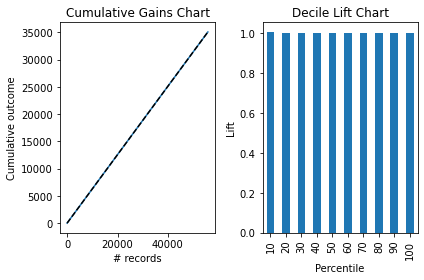

In [290]:
# code for generating cumulative gains and decile catboost with regression

pred_v = pd.Series(model.predict(X_test))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative outcome')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()